In [277]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format




In [278]:
os.listdir('dados')

['ExpEspumantes.csv', 'ExpVinho.csv', 'Producao.csv']

In [279]:
dados_exportacao =  pd.read_csv('dados/ExpVinho.csv', delimiter=";" , decimal="," ,  thousands=".")
dados_exportacao.columns
dados_exportacao.set_index("País")

,Id,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
África do Sul,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
"Alemanha, República Democrática",3,0,0,0,0,4168,2630,12000,8250,0,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
Angola,4,0,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
Anguilla,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,0,0
Uruguai,121,0,0,0,0,0,0,0,0,0,...,0,0,7711,29617,6180,18497,0,0,136774,149842
Vanuatu,122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,31,0,0


In [280]:
#lgeração da lista_base que pega os dados apenas dos últimos 15 anos.

ano = 2006
base = []
base.append("País")
while ano !=  2021:
    base.append(f"{ano}")
    base.append(f"{ano}.1")
    ano  =  ano + 1 





In [281]:
def formatar_colunas_df_exportacao(tipo_coluna):
    if ".1" in str(tipo_coluna):
        return f"Valor (US$)"
    else:
        return f"Quantidade (Kg)"


In [282]:
paises = dados_exportacao['País'].values

In [283]:
colunas_filtradas = dados_exportacao[base].set_index("País")


## Dados dos últimos 15 anos , referente ao processo de exportação

In [284]:
melted_data = colunas_filtradas.reset_index().melt(id_vars=["País"], value_vars=colunas_filtradas.columns)
melted_data.columns = ['Pais' , "ano" ,  "valor"]
melted_data['tipo'] = melted_data['ano'].apply(formatar_colunas_df_exportacao)
melted_data['ano'] = melted_data['ano'].apply(lambda x : str(x).replace(".1",""))
melted_data['ano'] = melted_data['ano'].apply(lambda x: datetime.strptime(x , '%Y'))


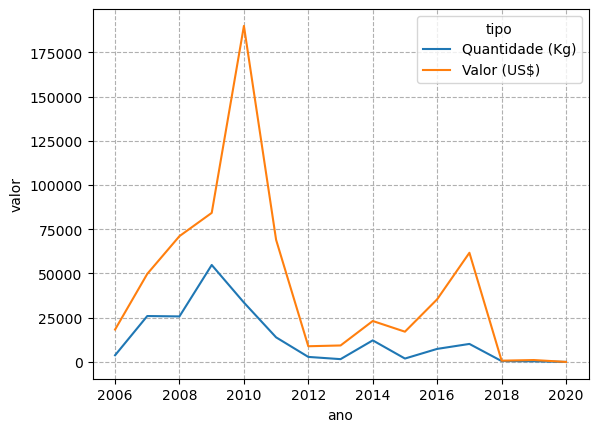

In [285]:
#base par as analises de exportação

por_pais = melted_data.query("Pais == 'Angola'")
sns.lineplot(x=por_pais.ano ,  y = por_pais.valor , hue=por_pais.tipo)
plt.grid(linestyle="--")
ax = plt.gca()



In [286]:
final_table = melted_data.groupby(["Pais","tipo"]).sum().reset_index()

In [287]:
final_table

,Pais,tipo,valor
0,Afeganistão,Quantidade (Kg),0
1,Afeganistão,Valor (US$),0
2,"Alemanha, República Democrática",Quantidade (Kg),1056537
3,"Alemanha, República Democrática",Valor (US$),2821569
4,Angola,Quantidade (Kg),194497
...,...,...,...
243,Vietnã,Valor (US$),15098
244,África do Sul,Quantidade (Kg),30
245,África do Sul,Valor (US$),116
246,Áustria,Quantidade (Kg),675


In [288]:
final = final_table.pivot(index="Pais" ,  columns='tipo' )

In [289]:
final.columns.name = None
final.reset_index()
final.columns.name = None

In [291]:
entrega = final.reset_index()
entrega['Pais Origem'] = "Brasil"
entrega.columns = [ "destino" , "Quantidade" ,  "Valor", 'origem']
entrega[['origem','destino',"Quantidade" , "Valor"]]

,origem,destino,Quantidade,Valor
0,Brasil,Afeganistão,0,0
1,Brasil,"Alemanha, República Democrática",1056537,2821569
2,Brasil,Angola,194497,639474
3,Brasil,Anguilla,0,0
4,Brasil,Antilhas Holandesas,133143,185283
...,...,...,...,...
119,Brasil,Vanuatu,18,31
120,Brasil,Venezuela,26580,47903
121,Brasil,Vietnã,11682,15098
122,Brasil,África do Sul,30,116
